## 1. Environmental Set-up & Data Loading

---



In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [2]:
# cd /content/drive/My Drive/ADX

In [3]:
# import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# 한글 나눔포트 사용
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# # 모델 수립을 위한 Train/Validation Set
# df = pd.read_csv('/content/drive/My Drive/ADX/Kia_dataset.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

# # 시스템 구현을 위한 Test Set 샘플
# df_test = pd.read_csv('/content/drive/My Drive/ADX/Kia_testset_sample.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

In [5]:
# 모델 수립을 위한 Train/Validation Set
df = pd.read_csv('Kia_dataset.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

# 시스템 구현을 위한 Test Set 샘플
df_test = pd.read_csv('Kia_testset_sample.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

In [6]:
df.head()

,GOODNO,SUCCYMD,CARNM,CHASNO,CARREGIYMD,YEAR,MISSNM,FUELNM,COLOR,EXHA,...,SUNLOOPPANORAMA,SUNLOOPCOMMON,SUNLOOPDUAL,DIS,TCS,AB1,ETC,AV,EPS,ECS
0,1512A2469,20160105,모닝 LPi LX 기본 블랙 프리미엄,KNABK518BBT020038,20100616.0,2011,A/T,LPG,C,1000,...,0,0,0,0,0,1,0,0,0,0
1,1512A2364,20160105,K3 1.6 가솔린(4도어) Nobless,KNAFZ412BDA040155,20130207.0,2013,A/T,가솔린,A,1600,...,0,0,0,0,0,0,0,1,0,0
2,1512A2319,20160105,K3 1.6 가솔린(4도어) Trendy,KNAFK412BEA206484,20140128.0,2014,A/T,가솔린,A,1591,...,0,0,0,0,0,0,0,1,0,0
3,1512A1643,20160105,K5 2.0LPI 렌터카 디럭스,KNAGN418BDA366086,20121218.0,2013,A/T,LPG,B,2000,...,0,0,0,0,0,0,0,0,0,0
4,1512A1371,20160105,K5 2.0LPI 렌터카 스마트,KNAGN415BBA140279,20110428.0,2011,A/T,LPG,D,2000,...,0,0,0,0,0,0,0,0,0,0


In [7]:
original_data = df.copy()

In [8]:
#데이터의 기본 골자를 확인 
print('Number_of_Observations :{}'.format(df.shape[0]))
print('Number_of_Variables :{}'.format(df.shape[1]))

Number_of_Observations :36794
Number_of_Variables :104


In [9]:
df.head()

,GOODNO,SUCCYMD,CARNM,CHASNO,CARREGIYMD,YEAR,MISSNM,FUELNM,COLOR,EXHA,...,SUNLOOPPANORAMA,SUNLOOPCOMMON,SUNLOOPDUAL,DIS,TCS,AB1,ETC,AV,EPS,ECS
0,1512A2469,20160105,모닝 LPi LX 기본 블랙 프리미엄,KNABK518BBT020038,20100616.0,2011,A/T,LPG,C,1000,...,0,0,0,0,0,1,0,0,0,0
1,1512A2364,20160105,K3 1.6 가솔린(4도어) Nobless,KNAFZ412BDA040155,20130207.0,2013,A/T,가솔린,A,1600,...,0,0,0,0,0,0,0,1,0,0
2,1512A2319,20160105,K3 1.6 가솔린(4도어) Trendy,KNAFK412BEA206484,20140128.0,2014,A/T,가솔린,A,1591,...,0,0,0,0,0,0,0,1,0,0
3,1512A1643,20160105,K5 2.0LPI 렌터카 디럭스,KNAGN418BDA366086,20121218.0,2013,A/T,LPG,B,2000,...,0,0,0,0,0,0,0,0,0,0
4,1512A1371,20160105,K5 2.0LPI 렌터카 스마트,KNAGN415BBA140279,20110428.0,2011,A/T,LPG,D,2000,...,0,0,0,0,0,0,0,0,0,0


## 2. Modelling

## 1) *data preprocessing*

In [10]:
# column 제거 

# 차량의 ID는 필요가 없다고 판단하여 삭제하였다 
# 차량ID('GOODNO') drop하는 함수
def drop_ID(df):
    
    df = df.copy()
    
    if 'GOODNO' in df.columns:
        
        df.drop(columns='GOODNO', inplace=True)
        
    else:
        
        print("There is no such column: 'GOODNO'")
        
    return df

In [11]:
#차량 아이디 제거
df_1 = drop_ID(df)
df_1.shape

(36794, 103)

In [12]:
#level 1 인 칼럼을 모두 제거해준다 
#제거된 칼럼 이름을 출력하고 제거된 데이터를 반환해준다  
def find_level_1(df):
    
    df = df.copy()
    
    level_1_index = []
    
    for i in df.columns:
    
        if len(set(df[i])) <=1:
            
            level_1_index.append(i)
            
    df.drop(level_1_index , axis=1 , inplace = True)
    
    print('Dropped columns : {}'.format(level_1_index))
    
    
    return df

In [13]:
#level이 1인 변수들은 제거해준다 
df_2 = find_level_1(df_1)
df_2.shape

Dropped columns : ['FRONT_RIGHT_FENDER', 'FRONT_LEFT_DOOR', 'BACK_RIGHT_DOOR', 'FRONT_PANNEL', 'RIGHT_STEP', 'LEFT_FILER_A', 'RIGHT_FILER_A', 'LEFT_FILER_B', 'RIGHT_FILER_B', 'LEFT_FILER_C', 'LEFT_REAR_FENDER', 'BACK_PANEL1', 'RIGHT_INSIDE_PANEL', 'LEFT_WHEEL_HOUSE', 'RIGHT_WHEEL_HOUSE', 'LEFT_INSIDE_WHEEL_HOUSE', 'DASH_PANEL', 'SHEET_PANEL', 'LEFT_QUARTER', 'RIGHT_QUARTER', 'LEFT_SIDE_PANEL', 'LEFT_REAR_CORNER_PANEL', 'RIGHT_REAR_CORNER_PANEL', 'LEFT_CORNER_PANEL', 'RIGHT_CORNER_PANEL', 'LEFT_SKIRT_PANEL', 'RIGHT_SKIRT_PANEL', 'SIDE_MEMBER_FRAME2', 'RIGHT_INSIDE_SHEETING', 'LEFT_WHEEL_HOUSE_SHEETING', 'RIGHT_REAR_INSIDE_PANEL_SHEETING', 'RIGHT_REAR_WHEEL_HOUSE_SHEETING', 'LEFT_SIDE_PANEL_SHEETING', 'RIGHT_SIDE_PANEL_SHEETING', 'JOINCAR', 'NOTAVAILABLE', 'MF_KEY', 'SUNLOOPDUAL', 'ETC', 'EPS']


(36794, 63)

In [14]:
# 각 컬럼별 null값 비율과 unique한 값들을 출력하는 함수
def print_null_ratio(df):
    
    df = df.copy()
    
    for i in df.columns:
        X_i = df.loc[:,i]
        print("column {} : {} not null ratio".format(i,X_i.dropna().shape[0]/df.shape[0]))
        print(df.loc[:,i].unique())
        print("")

In [15]:
print_null_ratio(df_2)

column SUCCYMD : 1.0 not null ratio
[20160105 20160106 20160107 20160108 20160109 20160112 20160113 20160114
 20160115 20160119 20160121 20160122 20160126 20160127 20160128 20160129
 20160130 20160202 20160203 20160204 20160205 20160211 20160212 20160213
 20160216 20160217 20160218 20160219 20160220 20160223 20160225 20160226
 20160229 20160303 20160304 20160308 20160310 20160311 20160312 20160315
 20160317 20160318 20160322 20160323 20160324 20160325 20160329 20160330
 20160331 20160401 20160402 20160405 20160407 20160408 20160412 20160414
 20160415 20160416 20160419 20160421 20160422 20160423 20160426 20160427
 20160428 20160429 20160430 20160503 20160504 20160509 20160510 20160512
 20160513 20160517 20160518 20160519 20160520 20160524 20160525 20160526
 20160527 20160528 20160531 20160601 20160602 20160603 20160607 20160608
 20160609 20160610 20160611 20160614 20160615 20160616 20160617 20160618
 20160621 20160622 20160623 20160624 20160625 20160628 20160629 20160630
 20160701 20160

In [16]:
# null값 존재하는 컬럼:
#     # 소수 존재
# CARREGIYMD(차량등록일) 
# FUELNM(연료타입) 
# USEUSENM(용도명) 
# OWNECLASNM(소유명) 

#     # 비교적 다수 존재
# SHIPPING_PRICE
# NC_GRADE_PRICE

In [17]:
print('-'*40)
print("Null 값 개수 in 'CARREGIYMD'", ':', len(df[df['CARREGIYMD'].isnull() == True]))
print("Null 값 개수 in 'FUELNM'", ':', len(df[df['FUELNM'].isnull() == True]))
print("Null 값 개수 in 'OWNECLASNM'", ':', len(df[df['OWNECLASNM'].isnull() == True]))
print('-'*40)
print("Null 값 개수 in 'USEUSENM'", ':', len(df[df['USEUSENM'].isnull() == True]))
print('-'*40)
print("Null 값 개수 in 'SHIPPING_PRICE'", ':', len(df[df['SHIPPING_PRICE'].isnull() == True]))
print("Null 값 개수 in 'NC_GRADE_PRICE'", ':', len(df[df['NC_GRADE_PRICE'].isnull() == True]))
print('-'*40)

----------------------------------------
Null 값 개수 in 'CARREGIYMD' : 1
Null 값 개수 in 'FUELNM' : 1
Null 값 개수 in 'OWNECLASNM' : 13
----------------------------------------
Null 값 개수 in 'USEUSENM' : 323
----------------------------------------
Null 값 개수 in 'SHIPPING_PRICE' : 4325
Null 값 개수 in 'NC_GRADE_PRICE' : 3781
----------------------------------------


In [18]:
#Null 값이 적은 3개의 변수는 관측치를 삭제한다
#용도명은 가격에 큰 영향을 주지 않는다고 판단하여, 최빈치로 채워준다. 
#프라이스는 따로 함수를 만들어서 처리해준다 

In [19]:
# 낙찰일자, 차량등록일 datetime 형식으로 변환
# 사용기간 변수 추가
# 사용기간이 음수인 레코드 제거

def to_datetime(df):
    
    df = df.copy()
    df['SUCCYMD_adj'] = datetime.datetime(2020,1,1)
    df['CARREGIYMD_adj'] = datetime.datetime(2020,1,1)
    df['Used_days'] = 0
    
    for i in range(df.shape[0]):
        df.loc[i, 'SUCCYMD'] = str(df.loc[i, 'SUCCYMD'])
        df.loc[i, 'CARREGIYMD'] = str(df.loc[i, 'CARREGIYMD'])
        df.loc[i, 'SUCCYMD_adj'] = datetime.datetime(int(df.loc[i, 'SUCCYMD'][0:4]), int(df.loc[i, 'SUCCYMD'][4:6]), int(df.loc[i, 'SUCCYMD'][6:8]))
        df.loc[i, 'CARREGIYMD_adj'] = datetime.datetime(int(df.loc[i, 'CARREGIYMD'][0:4]), int(df.loc[i, 'CARREGIYMD'][4:6]), int(df.loc[i, 'CARREGIYMD'][6:8]))
        
    df['Used_days'] = df['SUCCYMD_adj'] - df['CARREGIYMD_adj']
    
    neg_Used_days = []
    for i in range(df.shape[0]):
        if (df.loc[i, 'Used_days'] < datetime.timedelta(0)):
            neg_Used_days.append(i)
            
    df.drop(neg_Used_days, inplace=True)
    print('Dropped records with index:', neg_Used_days)
    df = df.reset_index(drop=True)
    
    df.drop(['SUCCYMD' , 'CARREGIYMD'] , axis =1 , inplace = True)
    
    return df

In [20]:
#'CARREGIYMD' , 'FUELNM' , 'OWNECLASNM' 는 Null 값이 있는경우 삭제해주고 
#'USEUSENM' 은 최빈치로 채워준다 
# price의 결측치는 shipping price > nc_grade_price > NEWCARPRICE 순으로 중요도를 설정하고 
# 3가지 모두 없을 경우 제거해준다 
def Null_handle(df):
    
    df = df.copy()
    
    #관측치 제거 
    df.drop(df[df['CARREGIYMD'].isnull() == True].index , axis = 0 , inplace = True )
    df.drop(df[df['FUELNM'].isnull() == True].index , axis = 0 , inplace = True )
    df.drop(df[df['OWNECLASNM'].isnull() == True].index , axis = 0 , inplace = True )
    
    #최빈치로 Null값 보간
    #fill_val = {'USEUSENM' : df.USEUSENM.mode()}
    
    #df.fillna(fill_val, inplace = True)
    
    #우선 드랍하고 진행 
    df.drop(df[df['USEUSENM'].isnull() == True].index , axis = 0 , inplace = True )
    
    df = df.reset_index(drop=True)
    
    return df 

# 3가지 유형의 Price 신뢰도순으로 선택하여 'PRICE_adj'에 저장 
# 값이 셋다 존재하지 않을 시 해당 레코드 제거
def make_price(df):
    
    import math
    
    df = df.copy()
    df['PRICE_adj'] = 0
    price_null_ind = []
    
    for i in range(df.shape[0]):
        if (math.isnan(df.loc[i, 'SHIPPING_PRICE']) == False):
            df.loc[i, 'PRICE_adj'] = df.loc[i, 'SHIPPING_PRICE']
        else:
            if (math.isnan(df.loc[i, 'NC_GRADE_PRICE']) == False):
                df.loc[i, 'PRICE_adj'] = df.loc[i, 'NC_GRADE_PRICE']
            else:
                if (math.isnan(df.loc[i, 'NEWCARPRIC']) == False):
                    df.loc[i, 'PRICE_adj'] = df.loc[i, 'NEWCARPRIC']
                else:
                    price_null_ind.append(i)
                    
    df.drop(price_null_ind, inplace=True)
    
    print('Dropped records with index:', price_null_ind)
    
    df.drop(['SHIPPING_PRICE' , 'NC_GRADE_PRICE'] , axis = 1 , inplace = True)
    
    df = df.reset_index(drop=True)
    
    return df

In [21]:
df_3 = Null_handle(df_2)
df_3 = make_price(df_3)

Dropped records with index: []


In [22]:
print('-'*40)
print("Null 값 개수 in 'CARREGIYMD'", ':', len(df_3[df_3['CARREGIYMD'].isnull() == True]))
print("Null 값 개수 in 'FUELNM'", ':', len(df_3[df_3['FUELNM'].isnull() == True]))
print("Null 값 개수 in 'OWNECLASNM'", ':', len(df_3[df_3['OWNECLASNM'].isnull() == True]))
print('-'*40)
print("Null 값 개수 in 'USEUSENM'", ':', len(df_3[df_3['USEUSENM'].isnull() == True]))
print('-'*40)

----------------------------------------
Null 값 개수 in 'CARREGIYMD' : 0
Null 값 개수 in 'FUELNM' : 0
Null 값 개수 in 'OWNECLASNM' : 0
----------------------------------------
Null 값 개수 in 'USEUSENM' : 0
----------------------------------------


In [23]:
if sum(df_3.isnull().sum()) == 0: 
    print('There_is_no_Null_values')

There_is_no_Null_values


In [24]:
print('dropped_observation_so_far : {}'.format(df.shape[0] - df_3.shape[0]))

dropped_observation_so_far : 331


In [25]:
# OX 나 YN으로 표현된 칼럼을 1,0으로 바꿔준다 
# O or Y -> 1    X or N -> 0
def str_to_onehot(df , str_columns): 
    
    df = df.copy()
    
    def temp_func(str_):
        
        if str_ == 'O' or str_ == 'Y': 
            
            str_ = 1
        else:
            
            str_ = 0
            
        return str_
    for column in str_columns:
        
        df[column] = df[column].apply(temp_func)
    
    return df
    

In [26]:
#변수중에 OX, YN으로 표현된것들이 있기 때문에 1,0 으로 다시 바꿔준다 
print('YEARCHK_components : {}'.format(set(df_3['YEARCHK'])))
print('INNEEXPOCLASCD_YN_components : {}'.format(set(df_3['INNEEXPOCLASCD_YN'])))

df_4 = str_to_onehot(df_3 , ['INNEEXPOCLASCD_YN' , 'YEARCHK'])

print('YEARCHK_components : {}'.format(set(df_4['YEARCHK'])))
print('INNEEXPOCLASCD_YN_components : {}'.format(set(df_4['INNEEXPOCLASCD_YN'])))

YEARCHK_components : {'N', 'Y'}
INNEEXPOCLASCD_YN_components : {'X', 'O'}
YEARCHK_components : {0, 1}
INNEEXPOCLASCD_YN_components : {0, 1}


In [27]:
# 낙찰일자, 차량등록일 datetime 형식으로 변환
# 사용기간 변수 추가
# 사용기간이 음수인 레코드 제거
def to_datetime(df):
    
    import datetime
    
    df = df.copy()
    df['SUCCYMD_adj'] = datetime.datetime(2020,1,1)
    df['CARREGIYMD_adj'] = datetime.datetime(2020,1,1)
    df['Used_days'] = 0
    
    for i in range(df.shape[0]):
        df.loc[i, 'SUCCYMD'] = str(df.loc[i, 'SUCCYMD'])
        df.loc[i, 'CARREGIYMD'] = str(df.loc[i, 'CARREGIYMD'])
        df.loc[i, 'SUCCYMD_adj'] = datetime.datetime(int(df.loc[i, 'SUCCYMD'][0:4]), int(df.loc[i, 'SUCCYMD'][4:6]), int(df.loc[i, 'SUCCYMD'][6:8]))
        df.loc[i, 'CARREGIYMD_adj'] = datetime.datetime(int(df.loc[i, 'CARREGIYMD'][0:4]), int(df.loc[i, 'CARREGIYMD'][4:6]), int(df.loc[i, 'CARREGIYMD'][6:8]))
        
    df['Used_days'] = df['SUCCYMD_adj'] - df['CARREGIYMD_adj']
    
    neg_Used_days = []
    for i in range(df.shape[0]):
        if (df.loc[i, 'Used_days'] < datetime.timedelta(0)):
            neg_Used_days.append(i)
            
    df.drop(neg_Used_days, inplace=True)
    print('Dropped records with index:', neg_Used_days)
    df = df.reset_index(drop=True)
    
    df.drop(['SUCCYMD' , 'CARREGIYMD'] , axis =1 , inplace = True)
    
    return df

In [28]:
#날짜형식의 데이터로 변환
#등록일자가 낙찰일자보다 빠른경우 삭제 
#사용기간 변수 추가 
df_5 = to_datetime(df_4)

Dropped records with index: [4000, 4001, 4012, 4216, 4755, 8250, 18879]


In [29]:
print('dropped_observation_so_far : {}'.format(df.shape[0] - df_5.shape[0]))

dropped_observation_so_far : 338


In [30]:
#파생변수 생성 
#차대 번호가 내포하는 의미가 
#1~3 제조국가, 회사 
#4~5 모델 
#6~7 타입 
#8 엔진 
#따라서 차대번호에서 4~8번째만 골라서 vin이라는 변수를 만들어준다

In [31]:
# 차대번호 5자리 뽑아내서 'vin' 이라는 새로운 컬럼생성
# 아웃풋에서는 차대번호를 삭제해준다 
def make_vin(df_input):
    
    df_input = df_input.copy()
    
    df_input['vin'] = ''

    for i in range(df_input.shape[0]):
        
        df_input.loc[i, 'vin'] = df_input.loc[i, 'CHASNO'][3:8]
        
    df_output = df_input.drop( columns ='CHASNO')
    
    return df_output

In [32]:
#차이름을 드랍해준다 
def drop_car_name(df):
    
    df = df.copy()
    
    df.drop(columns = 'CARNM', inplace = True)
    
    return df 

In [33]:
#vin칼럼을 생성해준다 

#실행시간이 오래 걸려서 실행후 다시 하는일이 없도록 주석처리해주자 
df_6 = make_vin(df_5)

In [34]:
df_7 = drop_car_name(df_6)

In [35]:
df_7.head()

,YEAR,MISSNM,FUELNM,COLOR,EXHA,TRAVDIST,USEUSENM,OWNECLASNM,INNEEXPOCLASCD_YN,NEWCARPRIC,...,DIS,TCS,AB1,AV,ECS,PRICE_adj,SUCCYMD_adj,CARREGIYMD_adj,Used_days,vin
0,2011,A/T,LPG,C,1000,38480,자가,법인,0,10704916,...,0,0,1,0,0,11310000.0,2016-01-05,2010-06-16,2029 days,BK518
1,2013,A/T,가솔린,A,1600,62240,자가,법인,0,21230000,...,0,0,0,1,0,19750000.0,2016-01-05,2013-02-07,1062 days,FZ412
2,2014,A/T,가솔린,A,1591,37926,자가,법인,0,18043152,...,0,0,0,1,0,19340000.0,2016-01-05,2014-01-28,707 days,FK412
3,2013,A/T,LPG,B,2000,110149,렌트,법인,0,17280000,...,0,0,0,0,0,17680000.0,2016-01-05,2012-12-18,1113 days,GN418
4,2011,A/T,LPG,D,2000,81675,렌트,법인,0,15800000,...,0,0,0,0,0,15800000.0,2016-01-05,2011-04-28,1713 days,GN415


In [36]:
# 한글값들 영어로 수정 (연료명, 용도명, 소유명에 대해서)
# 구글 코랩 한글사용시 오류 발생때문
def kor_to_eng(df):
    
    df = df.copy()
    
    dict_fuelnm = {'가솔린':'Gasoline', '디젤':'Diesel', '겸용':'Bi-fuel', 'LPG':'LPG', 'Hybrid':'Hybrid', '전기':'Electric'}
    dict_usenm = {'자가':'Own', '렌트':'Rent', '업무':'Work', '리스':'Lease', '사업':'Business'}
    dict_ownerclass = {'법인':'Corporate', '법인상품':'Corporate_prod', '개인':'Personal', '상품용':'Prod', '재외국인':'Foreigner', '개인사업':'Personal_business', '종교단체':'Religional'}

    for i in range(df.shape[0]):
        df.loc[i, 'FUELNM'] = dict_fuelnm[df.loc[i, 'FUELNM']]
        df.loc[i, 'USEUSENM'] = dict_usenm[df.loc[i, 'USEUSENM']]
        df.loc[i, 'OWNECLASNM'] = dict_ownerclass[df.loc[i, 'OWNECLASNM']]
        
    return df

In [37]:
df_8 = kor_to_eng(df_7)

In [38]:
#vin을 파생변수로 사용가능한지 판단하기 위해서 차원을 카운팅해준다 
#mode = 1 , 4~5자리만 남기고 레벨을 본다 
#mode = 2 , 4~8자리만 남기고 레벨을 본다 
def check_vin(df , mode): 
    
    if mode == 1 : 
        
        vins = []
        
        for i in range(0,len(df)): 
            
            vins.append(df.iloc[i]['vin'][0:2])
            
        print('level_of_vin_mode_1 is {}'.format(len(set(vins))))
        
    else: 
        
        vins = []
        
        for i in range(0,len(df)): 
            
            vins.append(df.iloc[i]['vin'])
            
        print('level_of_vin_mode_2 is {}'.format(len(set(vins))))

In [39]:
check_vin(df_8, mode = 1)

level_of_vin_mode_1 is 88


In [40]:
check_vin(df_8 , mode = 2)

level_of_vin_mode_2 is 257


In [41]:
#낙찰가격이 신차보다 비싼경우 행을 삭제해하고 데이터를 반환한다
def drop_error_price(df): 
    
    df = df.copy()
    
    print('Dropped_index : {}'.format(df[df['PRICE_adj'] < df['SUCCPRIC']].index))
    
    df.drop(df[df['PRICE_adj'] < df['SUCCPRIC']].index, axis=0 , inplace=True)
    
    return df

In [42]:
#낙찰 가격이 신차보다 비싼경우 이상치로 판단후 제거해 주었다 
df_9 = drop_error_price(df_8)

Dropped_index : Int64Index([   45,    60,    66,    85,    86,    88,   171,   179,   208,
              267,
            ...
            35792, 35814, 35830, 35978, 36004, 36022, 36126, 36261, 36340,
            36366],
           dtype='int64', length=718)


In [43]:
df_9.head()

,YEAR,MISSNM,FUELNM,COLOR,EXHA,TRAVDIST,USEUSENM,OWNECLASNM,INNEEXPOCLASCD_YN,NEWCARPRIC,...,DIS,TCS,AB1,AV,ECS,PRICE_adj,SUCCYMD_adj,CARREGIYMD_adj,Used_days,vin
0,2011,A/T,LPG,C,1000,38480,Own,Corporate,0,10704916,...,0,0,1,0,0,11310000.0,2016-01-05,2010-06-16,2029 days,BK518
1,2013,A/T,Gasoline,A,1600,62240,Own,Corporate,0,21230000,...,0,0,0,1,0,19750000.0,2016-01-05,2013-02-07,1062 days,FZ412
2,2014,A/T,Gasoline,A,1591,37926,Own,Corporate,0,18043152,...,0,0,0,1,0,19340000.0,2016-01-05,2014-01-28,707 days,FK412
3,2013,A/T,LPG,B,2000,110149,Rent,Corporate,0,17280000,...,0,0,0,0,0,17680000.0,2016-01-05,2012-12-18,1113 days,GN418
4,2011,A/T,LPG,D,2000,81675,Rent,Corporate,0,15800000,...,0,0,0,0,0,15800000.0,2016-01-05,2011-04-28,1713 days,GN415


In [44]:
#삭제된 관측치의 숫자 변화 추이 
print('dropped_observation_so_far : {}'.format(df.shape[0] - df_1.shape[0]))
print('dropped_observation_so_far : {}'.format(df.shape[0] - df_2.shape[0]))
print('dropped_observation_so_far : {}'.format(df.shape[0] - df_3.shape[0]))
print('dropped_observation_so_far : {}'.format(df.shape[0] - df_4.shape[0]))
print('dropped_observation_so_far : {}'.format(df.shape[0] - df_5.shape[0]))
print('dropped_observation_so_far : {}'.format(df.shape[0] - df_6.shape[0]))
print('dropped_observation_so_far : {}'.format(df.shape[0] - df_7.shape[0]))
print('dropped_observation_so_far : {}'.format(df.shape[0] - df_8.shape[0]))
print('dropped_observation_so_far : {}'.format(df.shape[0] - df_9.shape[0]))

dropped_observation_so_far : 0
dropped_observation_so_far : 0
dropped_observation_so_far : 331
dropped_observation_so_far : 331
dropped_observation_so_far : 338
dropped_observation_so_far : 338
dropped_observation_so_far : 338
dropped_observation_so_far : 338
dropped_observation_so_far : 1056


## 2) *Outlier handling*

In [45]:
### Column이 한글이면 에러가 발생할 수 있으므로 영문으로 사용하는 것을 추천 (아래 코드는 한글 폰트 사용)
### 각 plot 함수는 dataframe과 columns을 인풋으로 받아서 변수의 그림 출력
### plotHistogram은 histogram, plotPairplot은 컬럼별 scatter plot, plotBoxplot은 기준 컬럼(범주형 변수)에 대한 box plot
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

def plotHistogram(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    
    for _n, i in enumerate(columns):
        df.describe()
        fig=plt.figure(figsize=(20,8))
        fig.patch.set_facecolor('xkcd:white')

        plt.subplot(2,3,_n + 1)
        plt.title(i)
        df.loc[:,i].hist(bins=50)
    plt.show()
        
        
def plotPairplot(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    sns.pairplot(_df.loc[:,columns])
    plt.show()

        
def plotBoxplot(_df, basis_col1, y_col2):
    _unique = _df.loc[:, basis_col1].unique()
    if len(_unique) < 50:
        print("기준 컬럼의 종류가 너무 많습니다.(50개 이상)")
    
    box_plot=[]
    count_ = []
    for n,i in enumerate(_unique):
        box_plot.append(list(_df[_df.loc[:, basis_col1]==i].loc[:, y_col2]))
        count_.append(len((list(_df[_df.loc[:, basis_col1]==i].loc[:, y_col2]))))

    print('Count   ',count_)
    plt.boxplot(box_plot, flierprops=dict(markerfacecolor='g', marker='D'));
    plt.xticks(range(1,len(_unique)+1),_unique)

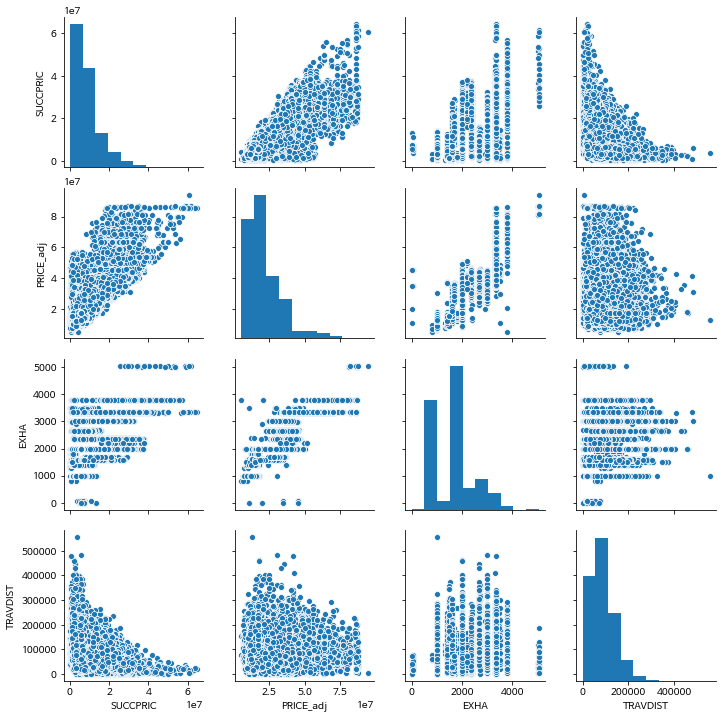

In [46]:
plotPairplot(df_9 , ['SUCCPRIC' , 'PRICE_adj' , 'EXHA' , 'TRAVDIST'])

In [47]:
EXHA = list(set(df_9['EXHA']))

In [48]:
EXHA.sort()

In [49]:
EXHA[0:10]

[0, 1, 50, 798, 800, 995, 998, 999, 1000, 1300]

In [50]:
#배기량이 0 인 관측치를 삭제 
df_10 = df_9.drop( df_9[df_9['EXHA'] == 0 ].index , axis=0  )
df_10.reset_index(drop=True)

,YEAR,MISSNM,FUELNM,COLOR,EXHA,TRAVDIST,USEUSENM,OWNECLASNM,INNEEXPOCLASCD_YN,NEWCARPRIC,...,DIS,TCS,AB1,AV,ECS,PRICE_adj,SUCCYMD_adj,CARREGIYMD_adj,Used_days,vin
0,2011,A/T,LPG,C,1000,38480,Own,Corporate,0,10704916,...,0,0,1,0,0,11310000.0,2016-01-05,2010-06-16,2029 days,BK518
1,2013,A/T,Gasoline,A,1600,62240,Own,Corporate,0,21230000,...,0,0,0,1,0,19750000.0,2016-01-05,2013-02-07,1062 days,FZ412
2,2014,A/T,Gasoline,A,1591,37926,Own,Corporate,0,18043152,...,0,0,0,1,0,19340000.0,2016-01-05,2014-01-28,707 days,FK412
3,2013,A/T,LPG,B,2000,110149,Rent,Corporate,0,17280000,...,0,0,0,0,0,17680000.0,2016-01-05,2012-12-18,1113 days,GN418
4,2011,A/T,LPG,D,2000,81675,Rent,Corporate,0,15800000,...,0,0,0,0,0,15800000.0,2016-01-05,2011-04-28,1713 days,GN415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35731,2016,A/T,Gasoline,A,998,62180,Own,Corporate_prod,0,1,...,0,0,0,0,0,12500000.0,2019-05-23,2015-02-16,1557 days,BE511
35732,2015,A/T,Gasoline,D,3778,97801,Own,Corporate_prod,0,1,...,0,0,0,0,0,56800000.0,2019-05-23,2014-12-18,1617 days,LT413
35733,2015,A/T,Gasoline,B,3342,153601,Rent,Corporate_prod,0,51780001,...,0,0,0,0,0,49089202.0,2019-05-23,2015-05-06,1478 days,LT411
35734,2015,A/T,LPG,A,1999,140058,Rent,Corporate_prod,0,1,...,0,0,0,0,0,17130000.0,2019-05-23,2014-07-18,1770 days,GN418


In [51]:
TRAVDIST = list(set(df_10['TRAVDIST']))

In [52]:
TRAVDIST.sort()

In [53]:
TRAVDIST[0:10]

[1, 5, 16, 27, 28, 29, 30, 31, 32, 34]

In [54]:
TRAVDIST[-10:]

[402409,
 403302,
 409413,
 430390,
 444783,
 457554,
 461900,
 477156,
 483031,
 555069]

In [55]:
#주행거리가 차를 사용한지 10년이 넘었는데 주행거리가 1이라는 것은 이상치로 판단 
df_11 = df_10.drop(df_10[df_10['TRAVDIST'] == 1].index, axis = 0 )
df_11.reset_index(drop=True)

,YEAR,MISSNM,FUELNM,COLOR,EXHA,TRAVDIST,USEUSENM,OWNECLASNM,INNEEXPOCLASCD_YN,NEWCARPRIC,...,DIS,TCS,AB1,AV,ECS,PRICE_adj,SUCCYMD_adj,CARREGIYMD_adj,Used_days,vin
0,2011,A/T,LPG,C,1000,38480,Own,Corporate,0,10704916,...,0,0,1,0,0,11310000.0,2016-01-05,2010-06-16,2029 days,BK518
1,2013,A/T,Gasoline,A,1600,62240,Own,Corporate,0,21230000,...,0,0,0,1,0,19750000.0,2016-01-05,2013-02-07,1062 days,FZ412
2,2014,A/T,Gasoline,A,1591,37926,Own,Corporate,0,18043152,...,0,0,0,1,0,19340000.0,2016-01-05,2014-01-28,707 days,FK412
3,2013,A/T,LPG,B,2000,110149,Rent,Corporate,0,17280000,...,0,0,0,0,0,17680000.0,2016-01-05,2012-12-18,1113 days,GN418
4,2011,A/T,LPG,D,2000,81675,Rent,Corporate,0,15800000,...,0,0,0,0,0,15800000.0,2016-01-05,2011-04-28,1713 days,GN415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35727,2016,A/T,Gasoline,A,998,62180,Own,Corporate_prod,0,1,...,0,0,0,0,0,12500000.0,2019-05-23,2015-02-16,1557 days,BE511
35728,2015,A/T,Gasoline,D,3778,97801,Own,Corporate_prod,0,1,...,0,0,0,0,0,56800000.0,2019-05-23,2014-12-18,1617 days,LT413
35729,2015,A/T,Gasoline,B,3342,153601,Rent,Corporate_prod,0,51780001,...,0,0,0,0,0,49089202.0,2019-05-23,2015-05-06,1478 days,LT411
35730,2015,A/T,LPG,A,1999,140058,Rent,Corporate_prod,0,1,...,0,0,0,0,0,17130000.0,2019-05-23,2014-07-18,1770 days,GN418


In [56]:
#신차 대비 낙찰가의 비율 
def price_ratio(df):
    
    df = df.copy()
    
    df['PRICE_RATIO'] = df['SUCCPRIC'] / df['PRICE_adj']
    
    return df 

In [57]:
def drop_price_ratio(df , threshold): 
    df = df.copy()
    
    df.drop( df[df['PRICE_RATIO'] <= np.percentile(df['PRICE_RATIO'] , threshold)].index , axis=0  , inplace = True )
    
    df.reset_index(drop = True)
    
    return df 
    

In [58]:
#신차대비 낙찰가의 비율을 변수에 추가한다 
df_12 = price_ratio(df_11)

In [59]:
#신차대비 낙차가의 백분위수가 1퍼센트 이하인 관측치를 삭제 
df_13 = drop_price_ratio(df_12 , threshold = 1 )

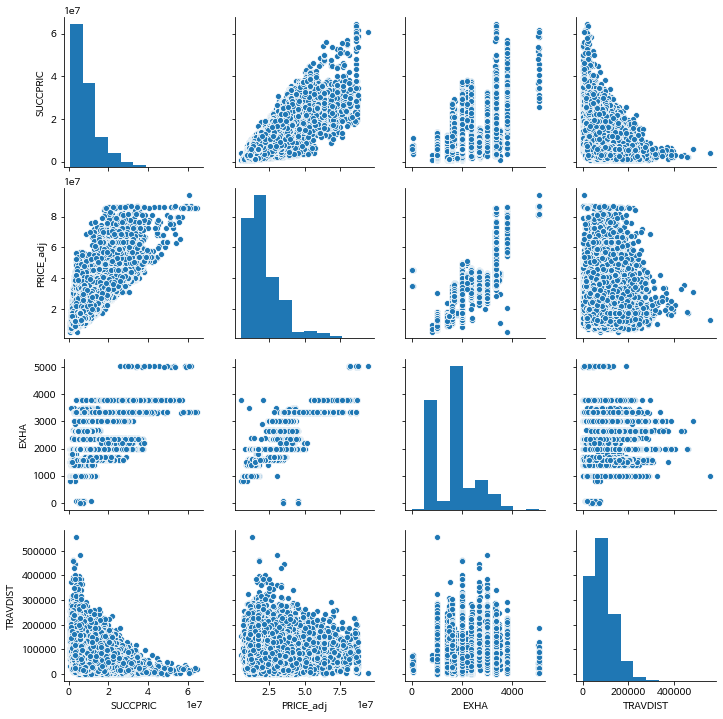

In [60]:
plotPairplot(df_13 , ['SUCCPRIC' , 'PRICE_adj' , 'EXHA' , 'TRAVDIST'])

In [61]:
#뉴메릭 변수들의 이상치는 어느정도 제거되었다고 판단 

In [62]:
#범주형 변수들의 유니크한 값을 갯수를 세어주어서 범주화 시켰을 경우 늘어나는 차원의 수를 계산 
def find_dimension(df , column): 
    
    df = df.copy()
    
    print(len(set(df[column])))

In [63]:
find_dimension(df_13 , 'MJ_MODEL_KEY' )
find_dimension(df_13 , 'DT_MODEL_KEY' )
find_dimension(df_13 , 'MJ_GRADE_KEY' )
find_dimension(df_13 , 'DT_GRADE_KEY' )
find_dimension(df_13 , 'NC_GRADE_KEY' )

17
51
182
507
617


In [64]:
# 낙찰일자('SUCCYMD_adj') 에서 월만 따로 빼서 'SUCCMONTH' 컬럼에 저장하는 함수
def make_succ_month(df):
    
    df = df.copy()
    df['SUCCMONTH'] = 0
    
    
    df['SUCCMONTH'] = df['SUCCYMD_adj'].apply(lambda x : x.month)
        
    return df

In [65]:
#낙찰일자에 따른 낙찰가격이 계절성이 있다는 참고자료를 사용해서 
#낙찰일자의 월만 따로 인트로 저장한다 
df_14 = make_succ_month(df_13)

In [66]:
df_14.shape

(35374, 64)

In [67]:
#사용날짜가 데이터타임 형식이어서 인트로 바꿔준다 
def used_day_to_int(df): 
    
    df = df.copy()
    
    df['Used_days'] = df['Used_days'].apply(lambda x : x.days)
    
    return df 

In [68]:
#당장 쓰지는 않는 칼럼은 삭제해 준다 
#다시 사용할수도 있음! 
df_15 = df_14.drop(['PRICE_RATIO' , 'vin'] , axis = 1)

In [69]:
df_16 = used_day_to_int(df_15)

In [70]:
#더미화 함수!!! 
#output은 더미화가 필요한 변수가 더미화가 되어서 원본데이터에 합쳐진값이다 
#숫자, 문자열 둘다 더미화 시켜주는 함수 
def cat_to_dummy(df , dummy_list): 
    
    df=df.copy()
    
    df[dummy_list] = df[dummy_list].astype(str)
    
    temp = pd.get_dummies(df[dummy_list])
    
    df.drop(dummy_list , inplace = True , axis = 1)
    
    df[temp.columns] = temp 
    
    return df

In [71]:
dummy_list = ['MISSNM', 'FUELNM', 'COLOR' , 'USEUSENM', 'OWNECLASNM', 'MJ_MODEL_KEY']
df_17 = cat_to_dummy(df_16 , dummy_list=dummy_list)

## 3) *Random Forest*

In [72]:
#일단은 대표 모델로만 모델을 돌려본다 
drop_list = ['DT_MODEL_KEY' , 'MJ_GRADE_KEY' , 'DT_GRADE_KEY' , 'NC_GRADE_KEY' , 'SUCCYMD_adj' , 'CARREGIYMD_adj']
df_18 = df_17.drop(drop_list , axis=1)

In [73]:
#Train_test_split 
from sklearn.model_selection import train_test_split
x_train , x_val , y_train , y_val = train_test_split(df_18.drop(['SUCCPRIC'] , axis=1 ) , df_18['SUCCPRIC'] , test_size = 0.2 , random_state = 100) 

In [74]:
#평가지표 함수 
#MSE,RMSE,MAE,MAPE를 출력해준다 
#True, Pred 순으로 넣어야한다 
#input은 list를 받는다 -> np array로 바꿔야할지도
def eval_indicator(y_true , y_pred):
    
    from sklearn import metrics
    import numpy as np 
    
    def mape(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    MSE = metrics.mean_squared_error(y_true ,y_pred )
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_true ,y_pred )
    MAPE = mape(y_true ,y_pred )
    eval_ = {"MSE" : [MSE] , "RMSE" : [RMSE] , "MAE" : [MAE] , "MAPE" : [MAPE]}
    eval_ = pd.DataFrame(eval_)
    eval_.index = ['Values']
    
    return eval_

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
reg = RandomForestRegressor(n_estimators=2000, 
                            n_jobs= -1 , 
                            random_state=100, 
                            max_depth=None,
                            max_features = 0.8 
                            )

%time reg.fit(x_train, y_train)

CPU times: user 14min 25s, sys: 11 s, total: 14min 36s
Wall time: 1min 28s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=-1, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

In [77]:
y_pred = reg.predict(x_val)

eval_indicator(y_val , y_pred)

,MSE,RMSE,MAE,MAPE
Values,7.167221e+11,846594.394703,567690.585866,8.068962


In [78]:
reg = RandomForestRegressor(n_estimators=500, 
                            n_jobs= -1 , 
                            random_state=100, 
                            max_depth=None,
                            max_features = 0.5 
                            )

%time reg.fit(x_train, y_train)

CPU times: user 2min 29s, sys: 4.72 s, total: 2min 34s
Wall time: 19 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

In [79]:
y_pred = reg.predict(x_val)

eval_indicator(y_val , y_pred)

,MSE,RMSE,MAE,MAPE
Values,6.760158e+11,822201.793569,553591.785159,7.955308


In [80]:
reg = RandomForestRegressor(n_estimators=500, 
                            n_jobs= -1 , 
                            random_state=100, 
                            max_depth=50,
                            max_features = 0.4 
                            )

%time reg.fit(x_train, y_train)

CPU times: user 2min 9s, sys: 2.95 s, total: 2min 12s
Wall time: 13.4 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features=0.4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

In [81]:
y_pred = reg.predict(x_val)

eval_indicator(y_val , y_pred)

,MSE,RMSE,MAE,MAPE
Values,6.647158e+11,815301.041898,548635.332862,7.93753


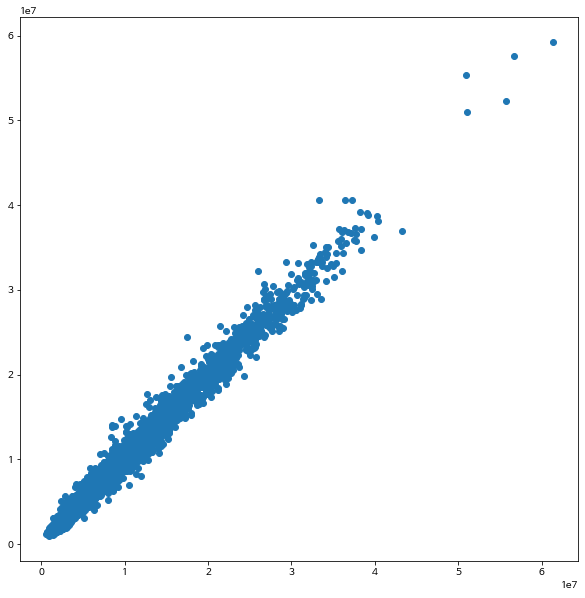

In [82]:
plt.rcParams['figure.figsize'] = [10,10]
plt.plot(y_val , reg.predict(x_val) , 'o')

In [83]:
## 컴퓨터 속도 때문에 시간이 오래 걸려서 local로 작업한 결과를 첨부하겠습니다.

from sklearn.model_selection import train_test_split , GridSearchCV , KFold
reg_g = RandomForestRegressor()
param_grid = {'max_depth' : [50,80,None] ,
              'max_features' : [0.5,0.6,0.7] ,
              'random_state' : [100] , 
              'n_estimators' : [500]}
cv = KFold(n_splits=5 , random_state=100)

gcv = GridSearchCV(reg_g , param_grid=param_grid , cv=cv , scoring='neg_mean_squared_error' , n_jobs=-1 , verbose=2)

gcv.fit(x_train , y_train)
print('params : ' , gcv.best_params_)
print('best score: ' , gcv.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 12.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 12.3min finished


params :  {'max_depth': 50, 'max_features': 0.5, 'n_estimators': 500, 'random_state': 100}
best score:  -742442143256.8582


## 3. System Implementation

In [84]:
# 시스템 구현을 위한 Test Set 샘플
df_test = pd.read_csv('Kia_testset_sample.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

In [85]:
# column 제거 

# 차량의 ID는 필요가 없다고 판단하여 삭제하였다 
# 차량ID('GOODNO') drop하는 함수
def drop_ID(df):
    
    df = df.copy()
    
    if 'GOODNO' in df.columns:
        
        df.drop(columns='GOODNO', inplace=True)
        
    else:
        
        print("There is no such column: 'GOODNO'")
        
    return df

In [86]:
def droplv1(df):

    df = df.copy()
    
    dropped_in_train_1 = ['FRONT_RIGHT_FENDER', 'FRONT_LEFT_DOOR', 'BACK_RIGHT_DOOR', 'FRONT_PANNEL', 'RIGHT_STEP', 'LEFT_FILER_A', 'RIGHT_FILER_A', 'LEFT_FILER_B', 'RIGHT_FILER_B', 'LEFT_FILER_C', 'LEFT_REAR_FENDER', 'BACK_PANEL1', 'RIGHT_INSIDE_PANEL', 'LEFT_WHEEL_HOUSE', 'RIGHT_WHEEL_HOUSE', 'LEFT_INSIDE_WHEEL_HOUSE', 'DASH_PANEL', 'SHEET_PANEL', 'LEFT_QUARTER', 'RIGHT_QUARTER', 'LEFT_SIDE_PANEL', 'LEFT_REAR_CORNER_PANEL', 'RIGHT_REAR_CORNER_PANEL', 'LEFT_CORNER_PANEL', 'RIGHT_CORNER_PANEL', 'LEFT_SKIRT_PANEL', 'RIGHT_SKIRT_PANEL', 'SIDE_MEMBER_FRAME2', 'RIGHT_INSIDE_SHEETING', 'LEFT_WHEEL_HOUSE_SHEETING', 'RIGHT_REAR_INSIDE_PANEL_SHEETING', 'RIGHT_REAR_WHEEL_HOUSE_SHEETING', 'LEFT_SIDE_PANEL_SHEETING', 'RIGHT_SIDE_PANEL_SHEETING', 'JOINCAR', 'NOTAVAILABLE', 'MF_KEY', 'SUNLOOPDUAL', 'ETC', 'EPS']
    
    for i in df.columns:
        if (i in dropped_in_train_1):
            df.drop(columns=i, inplace=True)
    return df

In [87]:
def to_datetime(df):
    
    df = df.copy()
    df['SUCCYMD_adj'] = datetime.datetime(2020,1,1)
    df['CARREGIYMD_adj'] = datetime.datetime(2020,1,1)
    df['Used_days'] = 0
    
    for i in range(df.shape[0]):
        df.loc[i, 'SUCCYMD'] = str(df.loc[i, 'SUCCYMD'])
        df.loc[i, 'CARREGIYMD'] = str(df.loc[i, 'CARREGIYMD'])
        df.loc[i, 'SUCCYMD_adj'] = datetime.datetime(int(df.loc[i, 'SUCCYMD'][0:4]), int(df.loc[i, 'SUCCYMD'][4:6]), int(df.loc[i, 'SUCCYMD'][6:8]))
        df.loc[i, 'CARREGIYMD_adj'] = datetime.datetime(int(df.loc[i, 'CARREGIYMD'][0:4]), int(df.loc[i, 'CARREGIYMD'][4:6]), int(df.loc[i, 'CARREGIYMD'][6:8]))
        
    df['Used_days'] = df['SUCCYMD_adj'] - df['CARREGIYMD_adj']
    
    neg_Used_days = []
    for i in range(df.shape[0]):
        if (df.loc[i, 'Used_days'] < datetime.timedelta(0)):
            neg_Used_days.append(i)
            
    df.drop(neg_Used_days, inplace=True)
    print('Dropped records with index:', neg_Used_days)
    df = df.reset_index(drop=True)
    
    df.drop(['SUCCYMD' , 'CARREGIYMD'] , axis =1 , inplace = True)
    
    return df

In [88]:
# 3가지 유형의 Price 신뢰도순으로 선택하여 'PRICE_adj'에 저장 
# 값이 셋다 존재하지 않을 시 해당 레코드 제거
def make_price(df):
    
    import math
    
    df = df.copy()
    df['PRICE_adj'] = 0
    price_null_ind = []
    
    for i in range(df.shape[0]):
        if (math.isnan(df.loc[i, 'SHIPPING_PRICE']) == False):
            df.loc[i, 'PRICE_adj'] = df.loc[i, 'SHIPPING_PRICE']
        else:
            if (math.isnan(df.loc[i, 'NC_GRADE_PRICE']) == False):
                df.loc[i, 'PRICE_adj'] = df.loc[i, 'NC_GRADE_PRICE']
            else:
                if (math.isnan(df.loc[i, 'NEWCARPRIC']) == False):
                    df.loc[i, 'PRICE_adj'] = df.loc[i, 'NEWCARPRIC']
                else:
                    price_null_ind.append(i)
                    
    df.drop(price_null_ind, inplace=True)
    
    print('Dropped records with index:', price_null_ind)
    
    df.drop(['SHIPPING_PRICE' , 'NC_GRADE_PRICE'] , axis = 1 , inplace = True)
    
    df = df.reset_index(drop=True)
    
    return df

In [89]:
# OX 나 YN으로 표현된 칼럼을 1,0으로 바꿔준다 
# O or Y -> 1    X or N -> 0
def str_to_onehot(df , str_columns): 
    
    df = df.copy()
    
    def temp_func(str_):
        
        if str_ == 'O' or str_ == 'Y': 
            
            str_ = 1
        else:
            
            str_ = 0
            
        return str_
    for column in str_columns:
        
        df[column] = df[column].apply(temp_func)
    
    return df

In [90]:
# dropping CHASNO
def drop_chasno(df):
    
    df = df.copy()
    
    df.drop(columns='CHASNO', inplace = True)
    
    return df

In [91]:
#차이름을 드랍해준다 
def drop_car_name(df):
    
    df = df.copy()
    
    df.drop(columns = 'CARNM', inplace = True)
    
    return df

In [92]:
# 한글값들 영어로 수정 (연료명, 용도명, 소유명에 대해서)
# 구글 코랩 한글사용시 오류 발생때문
def kor_to_eng(df):
    
    df = df.copy()
    
    dict_fuelnm = {'가솔린':'Gasoline', '디젤':'Diesel', '겸용':'Bi-fuel', 'LPG':'LPG', 'Hybrid':'Hybrid', '전기':'Electric'}
    dict_usenm = {'자가':'Own', '렌트':'Rent', '업무':'Work', '리스':'Lease', '사업':'Business'}
    dict_ownerclass = {'법인':'Corporate', '법인상품':'Corporate_prod', '개인':'Personal', '상품용':'Prod', '재외국인':'Foreigner', '개인사업':'Personal_business', '종교단체':'Religional'}

    for i in range(df.shape[0]):
        df.loc[i, 'FUELNM'] = dict_fuelnm[df.loc[i, 'FUELNM']]
        df.loc[i, 'USEUSENM'] = dict_usenm[df.loc[i, 'USEUSENM']]
        df.loc[i, 'OWNECLASNM'] = dict_ownerclass[df.loc[i, 'OWNECLASNM']]
        
    return df

In [93]:
# 낙찰일자('SUCCYMD_adj') 에서 월만 따로 빼서 'SUCCMONTH' 컬럼에 저장하는 함수
def make_succ_month(df):
    
    df = df.copy()
    df['SUCCMONTH'] = 0
    
    
    df['SUCCMONTH'] = df['SUCCYMD_adj'].apply(lambda x : x.month)
        
    return df

In [94]:
#사용날짜가 데이터타임 형식이어서 인트로 바꿔준다 
def used_day_to_int(df): 
    
    df = df.copy()
    
    df['Used_days'] = df['Used_days'].apply(lambda x : x.days)
    
    return df 

In [95]:
#더미화 함수!!! 
#output은 더미화가 필요한 변수가 더미화가 되어서 원본데이터에 합쳐진값이다 
#숫자, 문자열 둘다 더미화 시켜주는 함수 
def cat_to_dummy(df , dummy_list): 
    
    df=df.copy()
    
    df[dummy_list] = df[dummy_list].astype(str)
    
    temp = pd.get_dummies(df[dummy_list])
    
    df.drop(dummy_list , inplace = True , axis = 1)
    
    df[temp.columns] = temp 
    
    return df

In [96]:
def drop_useless(df):
    
    df = df.copy()
    
    drop_list = ['DT_MODEL_KEY' , 'MJ_GRADE_KEY' , 'DT_GRADE_KEY' , 'NC_GRADE_KEY' , 'SUCCYMD_adj' , 'CARREGIYMD_adj']
    df = df.drop(drop_list , axis=1)
    
    return df

In [97]:
#Kfold를 사용해서 트레인 값을 바꿔준 모델들의 결과의 평균을 이용
# #output = mean_of_predictions

# def k_fold_prediction(n_estimators , max_depth , n_splits , train_data , test_data):
    
#     from sklearn.model_selection import KFold
#     from sklearn.ensemble import RandomForestRegressor
#     import numpy as np 
    
#     reg_R = RandomForestRegressor(n_estimators=n_estimators,
#                                  random_state = 100,
#                                  max_depth=max_depth
#                                  )
    
#     cv = KFold(n_splits = 5 , random_state = 100 , suffle=True)
    
#     pred_y_sum = np.zeros(train_data.shape[0])
    
#     for tidx , vidx in cv.split(train_data):
        
#         train_cv = train_data.iloc[tidx]
#         val_cv = train_data.iloc[vidx]
        
#         train_x = train_cv.drop(['SUCCPRIC'] , axis = 1)
#         train_y = train_cv['SUCCPRIC']
        
#         val_x = val_cv.drop(['SUCCPRIC'] , axis = 1)
#         val_y = val_cv['SUCCPRIC']
        
#         reg_R.fit(train_x , train_y)
        
#         fold_state = 1 
#         print('Fold_{}_model_performance_by_validaion_data'.format(fold_state))
#         print(eval_indicator(val_y , reg_R.predict(val_x)))
        
#         pred_y = reg_R.predict(test_data)
        
#         #혹시 모르니까 결과값들을 폴드별로 저장해두자 
#         vars()['pred_y_{}'.format(fold_state)] = pred_y
        
#         fold_state = fold_state+1
        
#         pred_y_sum = pred_y_sum + pred_y
        
#     pred_y_mean = pred_y_sum / n_splits
    
#     return pred_y_mean

In [98]:
test_ind = df_test.columns
    
train_ind = df_18.columns
def everything(test):
    
    test = test.copy()
    
    test = drop_ID(test)

    test = droplv1(test)

    test = to_datetime(test)

    test = make_price(test)

    test = str_to_onehot(test, ['INNEEXPOCLASCD_YN', 'YEARCHK'])

    test = drop_car_name(test)

    test = kor_to_eng(test)

    test = make_succ_month(test)

    test = used_day_to_int(test)

    test = cat_to_dummy(test, ['MISSNM', 'FUELNM', 'COLOR' , 'USEUSENM', 'OWNECLASNM', 'MJ_MODEL_KEY'])

    test = drop_useless(test)

    test = drop_chasno(test)
    
    #df_train = pd.read_csv('train_data_set.csv' , encoding = 'cp949')
    
    #df_train = df_train.drop(['SUCCPRIC'] , axis=1)
    
    #df_train = df_train.drop(['Unnamed: 0'], axis=1)
    
    #test_ind = df_test.columns
    
    #train_ind = df_18.columns
    
    add_list=[]
    for i in train_ind:
        if i not in test_ind:
            add_list.append(i)
    
    for i in add_list:
        
        test[i] = 0
    
    return test

In [99]:
import datetime
test_data = everything(df_test)

Dropped records with index: []
Dropped records with index: []


In [100]:
test_x = test_data.drop(['SUCCPRIC'] , axis=1)
test_y = test_data['SUCCPRIC']
eval_indicator(test_y , reg.predict(test_x))

,MSE,RMSE,MAE,MAPE
Values,9.521649e+12,3.085717e+06,2130141.0,29.426361


## 4. 파생변수 고려 내용

In [101]:
# 교환여부, 교환횟수
def merge_exchange(df_tmp):
    df = df_tmp.copy()
    df_sub = df.loc[:, 'BONET':'BACK_PANEL2']
    df = df.drop(df.loc[:, 'BONET':'BACK_PANEL2'].head(0).columns, axis=1)
    
    df['EXCHANGE_SUM'] = df_sub.sum(axis = 1)
    #print(df['EXCHANGE_SUM'])
    
    df['EXCHANGE_BOOL'] = [0 for i in range(df.shape[0])]
    for i in range(df.shape[0]):
        if df['EXCHANGE_SUM'][i] == 0:
            df['EXCHANGE_BOOL'][i] = 0
        else:
            df['EXCHANGE_BOOL'][i] = 1
    #print(df['EXCHANGE_BOOL'])
    return df

# 용접여부, 용접횟수
def merge_sheeting(df_tmp):
    df = df_tmp.copy()
    df_sub = df.loc[:, 'RIGHT_WHEEL_HOUSE_SHEETING':'FLOOR_PANEL_SHEETING']
    df = df.drop(df.loc[:, 'RIGHT_WHEEL_HOUSE_SHEETING':'FLOOR_PANEL_SHEETING'].head(0).columns, axis=1)
    
    df['SHEETING_SUM'] = df_sub.sum(axis = 1)
    #print(df['SHEETING_SUM'])
    
    df['SHEETING_BOOL'] = [0 for i in range(df.shape[0])]
    for i in range(df.shape[0]):
        if df['SHEETING_SUM'][i] == 0:
            df['SHEETING_BOOL'][i] = 0
        else:
            df['SHEETING_BOOL'][i] = 1
    #print(df['SHEETING_BOOL'])
    return df

# 두 함수 합친것
def merge_exchange_and_sheeting(df_tmp):
    df = df_tmp.copy()
    df_1 = merge_exchange(df)
    df_2 = merge_sheeting(df_1)
    return df_2

In [102]:
df_18.shape

(35374, 93)

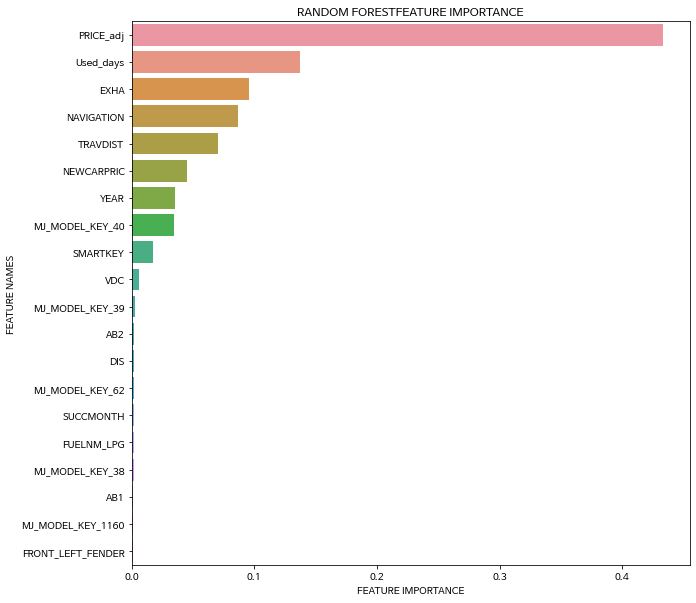

In [112]:
##Feature Importance

def plot_feature_importance(importance_, features_, model_type):
    dict_ = {'feature importance' : importance_, 'features' : features_}
    df = pd.DataFrame(dict_)
    df.sort_values(by=['feature importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,10))
    sns.barplot(x=df['feature importance'], y=df['features'][0:20])
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(gcv.best_estimator_.feature_importances_, x_val.columns, 'RANDOM FOREST')